## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read dataset
df=pd.read_csv('ab_data.csv')
#check data by looking at first five lines
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#returns deimensions of dataframe
num_rows=df.shape[0]
print('Number of rows in dataset is {}'.format(num_rows))

Number of rows in dataset is 294478


c. The number of unique users in the dataset.

In [4]:
#returns unique values for each column
num_unique=df.nunique()['user_id']
print('Number of unique users in dataset is {}'.format(num_unique))

Number of unique users in dataset is 290584


d. The proportion of users converted.

In [5]:
#proportion can be obtained with mean.
print('Proportion converted is {}%'.format((df['converted'].mean())*100))

Proportion converted is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#gets misaligned number of old page
mis_lined_old=df.query("group=='treatment' and landing_page == 'old_page'")
#gets misaligned number of new page
mis_lined_new=df.query("group=='control' and landing_page=='new_page'")
#adds previous two lines together
mis_lined_combined= len(mis_lined_old)+len(mis_lined_new)
print('Number of times new_page and treatment do not line up is {}'.format(mis_lined_combined))

Number of times new_page and treatment do not line up is 3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

The rows that are not aligned should be drop because they are inconclusive

In [8]:
#delete mismatched rows for both treatment and control groups
df.drop(df.query("group=='treatment' and landing_page=='old_page'").index,inplace=True)
df.drop(df.query("group=='control' and landing_page=='new_page'").index,inplace=True)

In [9]:
#checks to see if rows in the dataset were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
#saves cleaned datset to a new dataset
df.to_csv('ab2.csv')
df2=pd.read_csv('ab2.csv')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#check dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
Unnamed: 0      290585 non-null int64
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(3), object(3)
memory usage: 13.3+ MB


In [13]:
unq_id=df.nunique()['user_id']
print('number of unique user_ids is {}'.format(unq_id))

number of unique user_ids is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#check for duplicates
sum(df2['user_id'].duplicated())

1

In [15]:
#check for duplicate rows
df2[df2.duplicated(['user_id'], keep=False)]

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
#check duplicate row info
df2[df2.duplicated(['user_id'], keep=False)]

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#delete duplicate row by timestamp
dup='2017-01-14 02:55:59.590927'
df2=df2[df2.timestamp !=dup]

In [18]:
#check duplicate row has been removed
sum(df2['user_id'].duplicated())

0

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 6 columns):
Unnamed: 0      290584 non-null int64
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(3), object(3)
memory usage: 15.5+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
#calculate probability by mean since values are 1 and 0
p=df2['converted'].mean()
print('The probability of individuals converting is {}'.format(p))

The probability of individuals converting is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
df3=df2.groupby('group')
df3.describe()

Unnamed: 0                                                       \
               count          mean           std  min       25%       50%   
group                                                                       
control     145274.0  147382.23890  84991.143382  0.0  73687.75  147520.0   
treatment   145310.0  147160.25246  85005.296818  2.0  73657.25  147095.0   

                               converted              ...               \
                 75%       max     count      mean    ...     75%  max   
group                                                 ...                
control    220915.75  294476.0  145274.0  0.120386    ...     0.0  1.0   
treatment  220822.50  294477.0  145310.0  0.118808    ...     0.0  1.0   

            user_id                                                    \
              count           mean           std       min        25%   
group                                                                   
control    145274.0  788164.072594  91287.914601  630002.0  709279.50   
treatment  145310.0  787845.719290  91161.564429  630000.0  708745.75   

                                          
                50%        75%       max  
group                                     
control    788128.5  867208.25  945998.0  
treatment  787876.0  866718.75  945999.0  

[2 rows x 24 columns]

Individuals in control group had .120386 probability of converting

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Individuals in treatment group had .118808 of converting

d. What is the probability that an individual received the new page?

In [22]:
#get number of individuals who recieved new page by count of treatment group
num_treat=len(df.query("group=='treatment'"))

#count number of individuals in dataset
num_ind=df2.shape[0]

#divide previous lines to get probability
p1=num_treat/num_ind
print('Probability of an individual recieved the new page is {}'.format(p1))

Probability of an individual recieved the new page is 0.5000653855683727


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Individuals in the treatment group had a conversion probability of .118807 and individuals in the control group had a conversion probability of .120386. Because the difference is incredibly small.  I do not believe that one page influences conversion at a higher rate than another. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

null hypothesis: The difference in conversion rate between the new page and the old page will be equal to zero or lower than zero.  This means the conversion rate between the two pages will be the same or the old page will have a higher conversion rate.


Alternative hypothesis: The difference in conversion rate between the new page and the old page will be equal to greater than zero.  This means the new page would have a higher conversion rate.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new=df2['converted'].mean()
print('Conversion rate for Pnew is {}'.format(p_new))

Conversion rate for Pnew is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old=df2['converted'].mean()
print('Conversion rate for Pold is {}'.format(p_old))

Conversion rate for Pold is 0.11959708724499628


c. What is $n_{new}$?

In [25]:
n_new=len(df2.query("group=='treatment'"))
print('n_new = {}'.format(n_new))

n_new = 145310


d. What is $n_{old}$?

In [26]:
n_old=len(df2.query("group=='control'"))
print('n_old = {}'.format(n_old))

n_old = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted=np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)])

In [28]:
#check simulation above
print(len(new_page_converted))

145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

In [30]:
#check simulation above
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
#truncate new_page_converted
new_page_converted = new_page_converted[:145274]

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs=[]

for _ in range(10000):
    new_page_converted=np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted=np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)]).mean()
    difference=new_page_converted-old_page_converted
    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

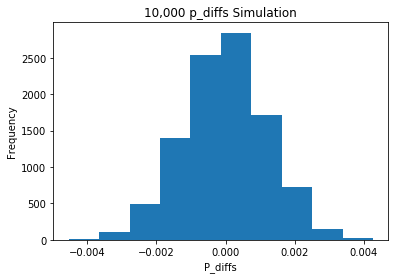

In [33]:
plt.hist(p_diffs)
plt.xlabel('P_diffs')
plt.ylabel('Frequency')
plt.title('10,000 p_diffs Simulation');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
#calculate differnece from original dataset
diff=df[df['group']=='treatment']['converted'].mean()-df[df['group']=='control']['converted'].mean()
print('Actual difference observed is {}'.format(diff))

Actual difference observed is -0.0015790565976871451


In [35]:
#calculate proportion of p_diffs to actual difference
p_diffs=np.array(p_diffs)

(diff<p_diffs).mean()

0.9042

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In this section we calculated the p-value which is the calculated probability for a null hypothesis significance test. This value means we fail to reject the null hypothesis as we cannot definitley say that either page performs better than the other.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = sum(df2.query("group=='control'")['converted'])
convert_new = sum(df2.query("group=='treatment'")['converted'])
n_old = len(df2.query("group=='control'"))
n_new = len(df2.query("group=='treatment'"))

#to check above code
print(convert_old,convert_new,n_old,n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


In [38]:
from scipy.stats import norm

#calculate critical value at 95% confidence interveral
ctl_val=norm.ppf(1-(0.05))

print(ctl_val)

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

With a z-score (1.31) less than the critical value(1.64) we fail to reject the null hypothesis and cannot conclude that one page does not convert significantly better than the other page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2['intercept'] = pd.Series(np.zeros(len(df2)), index=df2.index)
df2['ab_page'] = pd.Series(np.zeros(len(df2)), index=df2.index)

In [40]:
# select index to be changed
change_index = df2[df2['group']=='treatment'].index

# Change values
df2.set_value(index=change_index, col='ab_page', value=1)
df2.set_value(index=df2.index, col='intercept', value=1)

# convert to intergers
df2[['intercept', 'ab_page']] = df2[['intercept', 'ab_page']].astype(int)

# rename columns
df2 = df2[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

In [41]:
#check above code
df2[df2['group']=='treatment'].head()


,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
logit=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
model=logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:20:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?



The p_value for the ab_page is .19 which is slightly smaller than the p-value calculated in part 2. The reason it differs is becuase in the part 2 we are conducting a one-tailed test concerned with the page that had a higher conversion rate.  In the regression model we conducted a two-tailed test concerned with if the condition had any effect at all. Ultimately the p_value is too high to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is generally best to consider other factors when making the regression model because they can affect conversion rate.  As it pertians to this analysis, conversion can be altered by the fact that someone can visit the page multiple times before finally converting.  The disadvatages of adding additional items is overcomplicating the dataset.  What ends up happening is the model is fit to a specific sample rather than the overall population. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,ab_page,intercept,converted
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0


In [45]:
### Create the necessary dummy variables
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [46]:
df_new[['UK','US']]=pd.get_dummies(df_new['country'])[['UK','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results
df2['intercept']=1

logm=sm.Logit(df_new['converted'], df_new[['UK', 'US', 'ab_page', 'intercept']])
results=logm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        01:20:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

It seems that country does influence conversion rate but not enough to be considered statistically significant.  The ab_page p_value is 0.19 and much to high to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

It was found that the old page is only microscopicaly better than the new page.  Thus we fail to reject the null hypothesis. The limitations to this analysis is there were not any additional terms to add to the regression model that may have influenced the conversion rate.  The regression model could have been better if there was information regarding if users were new to the website or returning.

